<a href="https://colab.research.google.com/github/Sirri69/Ames-Housing/blob/master/AmesHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pickle5 
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 133kB 8.1MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219279 sha256=06a228428fc80f2c4ff23f8b01f112951f029e6111b77390436ad31c7960f870
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pickle


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/AMES/train.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data['KitchenQual'].value_counts()
735+586+100+39
# pd.get_dummies(data['KitchenQual'])
# pd.concat([data,pd.get_dummies(data['KitchenQual'])],axis=1)

1460

In [ ]:
plt.figure(figsize=(81,81))
corr=data.corr()
corr.style.background_gradient('coolwarm')


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<Figure size 5832x5832 with 0 Axes>

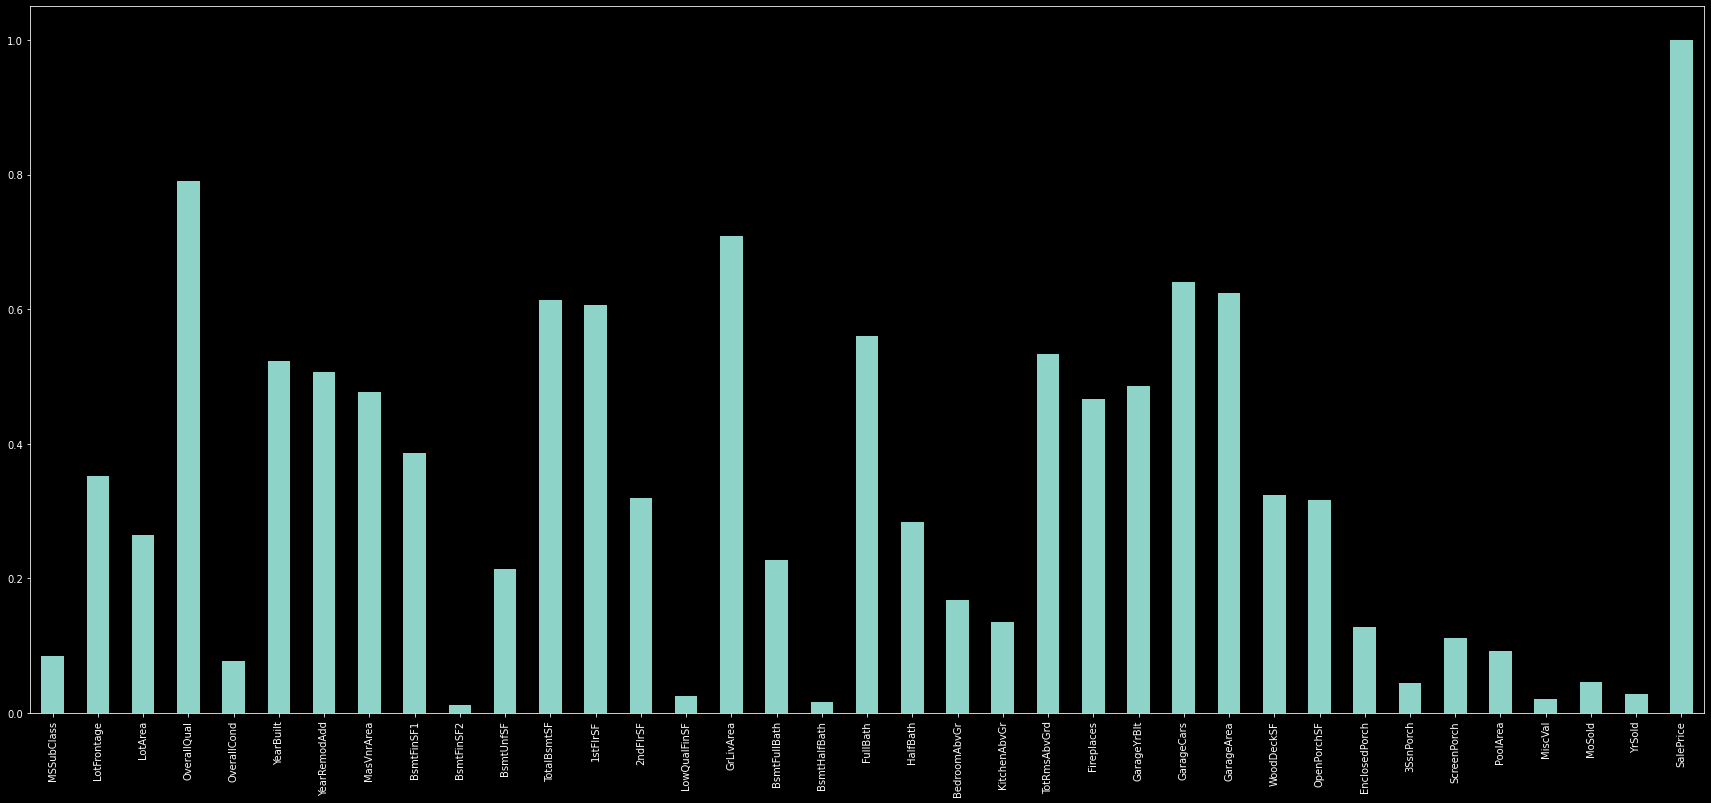

In [ ]:
c=abs(data.corr()['SalePrice'][1:])
plt.rcParams['figure.figsize']=[30,13]
plt.style.use('dark_background')
c.plot(kind='bar')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
train_data=data[['OverallQual','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','SalePrice']]
# train_data=pd.concat([train_data,pd.get_dummies(data['KitchenQual'])],axis=1)
train_data.info()
train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   Fireplaces    1460 non-null   int64  
 9   GarageYrBlt   1379 non-null   float64
 10  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 125.6 KB


,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,SalePrice
0,7,2003,856,856,854,1710,2,8,0,2003.0,208500
1,6,1976,1262,1262,0,1262,2,6,1,1976.0,181500
2,7,2001,920,920,866,1786,2,6,1,2001.0,223500
3,7,1915,756,961,756,1717,1,7,1,1998.0,140000
4,8,2000,1145,1145,1053,2198,2,9,1,2000.0,250000
5,5,1993,796,796,566,1362,1,5,0,1993.0,143000
6,8,2004,1686,1694,0,1694,2,7,1,2004.0,307000
7,7,1973,1107,1107,983,2090,2,7,2,1973.0,200000
8,7,1931,952,1022,752,1774,2,8,2,1931.0,129900
9,5,1939,991,1077,0,1077,1,5,2,1939.0,118000


In [ ]:
#As Column Of GarageYrBlt has NULL values, and is also highly co-related to Year in which house was built, we will train a lin reg model to fill null values


# tr=(filter(train_data['YearBuilt'],train_data['GarageYrBlt'].notna())) ITS RETURNING MEMORY ADDRESS INSTEAD OF A LIST
x=[]
y=[]

temp=train_data['GarageYrBlt'].fillna(0.0)

# print(temp.head(50))

for i in range(1460):
  if temp[i] != 0.0:
    x.append(train_data['YearBuilt'][i])
    y.append(train_data['GarageYrBlt'][i])
print(len(x))


1379


In [ ]:
#Training the reggressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

x_=np.array(x)
x_=x_.reshape(-1,1)

# x_=scale(x_)
# y=scale(y).reshape(-1,1)
print(y)

p=PolynomialFeatures(degree=30)
x_=p.fit_transform(x_)
model=LinearRegression(n_jobs=-1, normalize=True)
model.fit(x_,y)
model.score(x_,y)

[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0, 1970.0, 1967.0, 2004.0, 1958.0, 2005.0, 1930.0, 2002.0, 1976.0, 1968.0, 2007.0, 2005.0, 2008.0, 1957.0, 1920.0, 1920.0, 1966.0, 2007.0, 1959.0, 2005.0, 2004.0, 1995.0, 1954.0, 1953.0, 1965.0, 1959.0, 1983.0, 1977.0, 1959.0, 2005.0, 2003.0, 2006.0, 1966.0, 1997.0, 1985.0, 1963.0, 1981.0, 1962.0, 1964.0, 1999.0, 2004.0, 2006.0, 1973.0, 2006.0, 1935.0, 2006.0, 1990.0, 1998.0, 2004.0, 1970.0, 2003.0, 1945.0, 1953.0, 1973.0, 1987.0, 1998.0, 1989.0, 1915.0, 1973.0, 1956.0, 1948.0, 1966.0, 1968.0, 1998.0, 2007.0, 1974.0, 1995.0, 1991.0, 2005.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1997.0, 1993.0, 1999.0, 1965.0, 1920.0, 1977.0, 1985.0, 1979.0, 2009.0, 1951.0, 2003.0, 1954.0, 1948.0, 1977.0, 1954.0, 2000.0, 2007.0, 1953.0, 1945.0, 1999.0, 1962.0, 2007.0, 1990.0, 2005.0, 1969.0, 1979.0, 1958.0, 1993.0, 1979.0, 1977.0, 1966.0, 1998.0, 1966.0, 2000.0, 1974.0, 2001.0,

0.7574386503948378

In [ ]:
x_

array([[1.00000000e+00, 2.00300000e+03, 4.01200900e+06, ...,
        2.79941045e+92, 5.60721914e+95, 1.12312599e+99],
       [1.00000000e+00, 1.97600000e+03, 3.90457600e+06, ...,
        1.91440724e+92, 3.78286870e+95, 7.47494855e+98],
       [1.00000000e+00, 2.00100000e+03, 4.00400100e+06, ...,
        2.72219030e+92, 5.44710279e+95, 1.08996527e+99],
       ...,
       [1.00000000e+00, 1.94100000e+03, 3.76748100e+06, ...,
        1.16068665e+92, 2.25289280e+95, 4.37286492e+98],
       [1.00000000e+00, 1.95000000e+03, 3.80250000e+06, ...,
        1.32120168e+92, 2.57634328e+95, 5.02386940e+98],
       [1.00000000e+00, 1.96500000e+03, 3.86122500e+06, ...,
        1.63738773e+92, 3.21746689e+95, 6.32232244e+98]])

0.7574386503948378


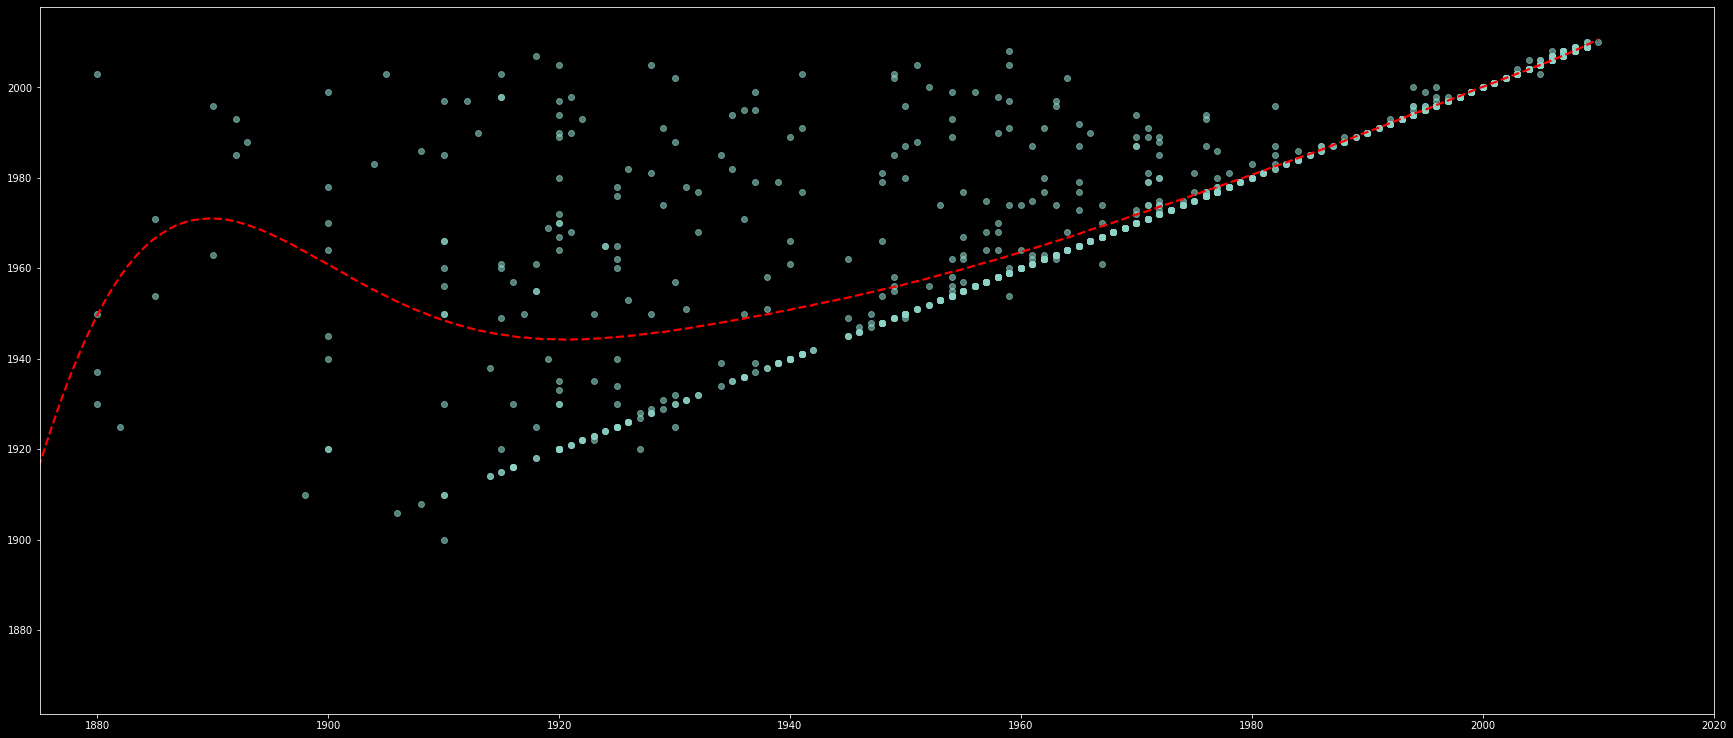

In [ ]:
# model.coef_
# model.intercept_
# plt.scatter()

plt.xlim(1875,2020)
# plt.ylim(1870,2020)

temp2=model.predict(p.fit_transform(np.linspace(1870,2010,200).reshape(-1,1)))
# print(temp)

plt.scatter(x,y,alpha=0.6)
plt.plot(np.linspace(1870,2010,200),temp2,'r--',lw=2.18)

# plt.ylim((-1.02,01.02))
# plt.xlim((1865))

from sklearn.metrics import r2_score

print(r2_score(y,model.predict(x_)))
# print(model.predict(x_))

In [ ]:
# THE ABOVE MODEL DOESN'T LOOK GOOD BUT SOMEHOW IT GIVES US 75.74381 R2 SCORE, WHICH IS GOOD ENOUGH TO FILL EMPTY VALUES
# NOW WE CAN FILL THE MISSING VALUES USING THE MODEL

import math

for i in range(1460):
  if temp[i] == 0.0:
    train_data['GarageYrBlt'][i] = math.ceil(model.predict(p.fit_transform(train_data['YearBuilt'][i].reshape(-1,1))))

# print(model.predict(p.fit_transform(train_data['YearBuilt'][5].reshape(-1,1))))
# print(train_data['GarageYrBlt'][5])

# print(train_data['GarageYrBlt'].head(50))

In [ ]:
#NOW WE WILL START WORKING WITH CATEGORICAL VARIABLES

pd.get_dummies(data['KitchenQual'])
train_data=pd.concat([train_data,pd.get_dummies(data['KitchenQual'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['Street'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['Utilities'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['PoolQC'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['BsmtCond'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['RoofStyle'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['MSZoning'])],axis=1)
train_data=pd.concat([train_data,pd.get_dummies(data['Alley'])],axis=1)

train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   Fireplaces    1460 non-null   int64  
 9   GarageYrBlt   1460 non-null   float64
 10  SalePrice     1460 non-null   int64  
 11  Ex            1460 non-null   uint8  
 12  Fa            1460 non-null   uint8  
 13  Gd            1460 non-null   uint8  
 14  TA            1460 non-null   uint8  
 15  Grvl          1460 non-null   uint8  
 16  Pave          1460 non-null   uint8  
 17  AllPub        1460 non-null   uint8  
 18  NoSeWa        1460 non-null 

In [ ]:
X=train_data.drop(['SalePrice'],axis=1)
# X.info()
Y=train_data['SalePrice']
# Y.head()

# p=PolynomialFeatures(degree=2)

# X=p.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

model2=LinearRegression(n_jobs=-1)
x_train,x_test,y_train,y_test=train_test_split(X,Y)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)


0.6874706929206338

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model3=AdaBoostRegressor(n_estimators=30000,base_estimator=LinearRegression(n_jobs=-1),learning_rate=1.05)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.6819966618817186

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model4=DecisionTreeRegressor(min_samples_leaf=10,min_samples_split=15)
model4.fit(x_train,y_train)
model4.score(x_test,y_test)
# model4.score(x_train,y_train)

0.7385003795910339

In [ ]:
model5=AdaBoostRegressor(n_estimators=10600,base_estimator=model4,learning_rate=1.05)
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.7237543144436364

In [ ]:
model6=AdaBoostRegressor(n_estimators=5,base_estimator=model5,learning_rate=1.005)
model6.fit(x_train,y_train)
model6.score(x_test,y_test)

0.8470619697709697

In [ ]:
from sklearn.ensemble import BaggingRegressor

modelt=BaggingRegressor(base_estimator=AdaBoostRegressor(n_estimators=3,base_estimator=model5,learning_rate=1.07),n_estimators=2,max_features=0.5,n_jobs=-1)
modelt.fit(x_train,y_train)
modelt.score(x_test,y_test)

0.7112040399028867

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelr=RandomForestRegressor(n_estimators=500, min_samples_leaf=5, min_samples_split=7)
modelr.fit(x_train,y_train)
modelr.score(x_test,y_test)

0.7774384906814994

In [ ]:
modelq=BaggingRegressor(base_estimator=modelr, n_estimators=250,max_features=0.75,n_jobs=-1)
modelq.fit(x_train,y_train)
modelq.score(x_test,y_test)

0.7799691994807475

In [ ]:
#GETTING FINAL RESULTS FROM THE FULL DATA


model6.score(X,Y)

0.9323428869333948

Results look very noice, both on the test data, and on the whole data....

In [ ]:
#SAVING THE MODEL

pickle.dump(model6,open('my_model.sav','wb'))